In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train_original, Y_train_original), (X_test_original, Y_test_original) = mnist.load_data()

In [3]:
print(X_train_original.shape)
print(Y_train_original.shape)
print(X_test_original.shape)
print(Y_test_original.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
x_train=np.array(X_train_original)
y_train=keras.utils.to_categorical( Y_train_original, num_classes=10)
x_test=np.array(X_test_original)
y_test=keras.utils.to_categorical( Y_test_original, num_classes=10)

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [6]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [7]:
type(x_train)

numpy.ndarray

In [8]:
#model architecture
#model=Sequential()
#model.add(Dense(64, activation='relu', input_shape=(64,28, 28, 1)))
#model.add(Dense(10,activation='softmax'))
model = tf.keras.models.Sequential([  
    tf.keras.layers.Conv2D(28, (3,3), activation='relu', input_shape=(28, 28, 1)),  
    tf.keras.layers.MaxPooling2D((2, 2)),  
    tf.keras.layers.Conv2D(56, (3,3), activation='relu'),  
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(10, activation='softmax'),  
]) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 flatten (Flatten)           (None, 6776)              0         
                                                                 
 dense (Dense)               (None, 64)                433728    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [9]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [10]:
history=model.fit(x_train,y_train,epochs=30,batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 20s 25ms/step - loss: 0.1546 - accuracy: 0.9521 - val_loss: 0.0538 - val_accuracy: 0.9833
Epoch 2/30
750/750 [==============================] - 18s 25ms/step - loss: 0.0485 - accuracy: 0.9851 - val_loss: 0.0495 - val_accuracy: 0.9849
Epoch 3/30
750/750 [==============================] - 19s 25ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0369 - val_accuracy: 0.9891
Epoch 4/30
750/750 [==============================] - 19s 25ms/step - loss: 0.0228 - accuracy: 0.9934 - val_loss: 0.0373 - val_accuracy: 0.9903
Epoch 5/30
750/750 [==============================] - 19s 25ms/step - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.0451 - val_accuracy: 0.9883
Epoch 6/30
750/750 [==============================] - 19s 26ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.0385 - val_accuracy: 0.9906
Epoch 7/30
750/750 [==============================] - 19s 25ms/step - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.0515 - val_accuracy:

In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

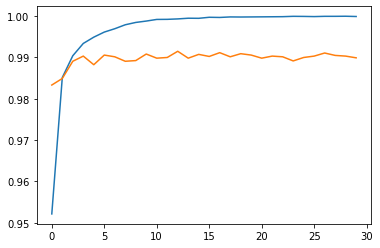

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

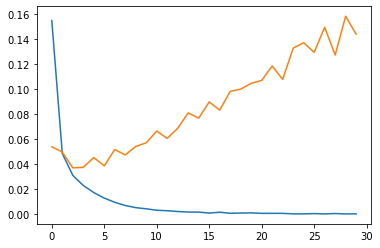

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [18]:
loss,acc=model.evaluate(x_test,y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.1256 - accuracy: 0.9899

Testing loss: 0.13, acc: 0.99%


In [22]:
predicted_classes=model.predict(x_test)
predicted_classes=np.argmax(predicted_classes, axis=1)
print("predicted:")
print(predicted_classes)
print("True label:")
print(Y_test_original)

predicted:
[7 2 1 ... 4 5 6]
True label:
[7 2 1 ... 4 5 6]


In [24]:
np.sum(predicted_classes)

44342